In [1]:
from targets.variational_inference_target import *
from targets.density_estimation_target import Dimension1 as D1
import matplotlib.pyplot as plt
target = Dimension1()

In [2]:
from samplers import IMH

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:16<00:00, 241.37it/s, acceptance = tensor(0.4101)]


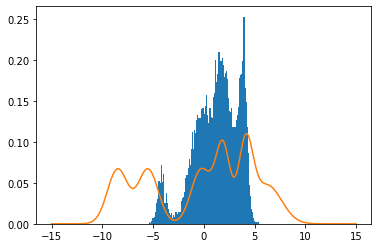

In [3]:
imh = IMH(target.log_prob,1,number_chains = 10000)
proposal = torch.distributions.MultivariateNormal(torch.ones(1)*(-2), 50*torch.eye(1))
imh.sample(proposal,4000)
hist = plt.hist(imh.x.numpy(), bins = 100, density = True)
tt = torch.linspace(-15,15,200)
plt.plot(tt, torch.exp(target.log_prob(tt.unsqueeze(-1))))
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:19<00:00, 205.92it/s, acceptance = tensor(0.5468)]


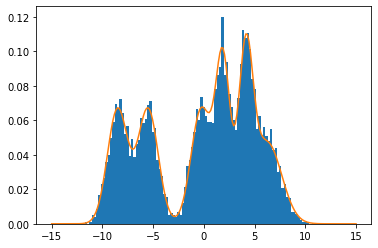

In [4]:
proposal = torch.distributions.MultivariateNormal(torch.ones(1)*(-2), 20*torch.eye(1))
imh = IMH(target.log_prob,1,proposal,number_chains = 10000)
x = imh.sample(4000)
hist = plt.hist(x.numpy(), bins = 100, density = True)
tt = torch.linspace(-15,15,200)
plt.plot(tt, torch.exp(target.log_prob(tt.unsqueeze(-1))))
plt.show()